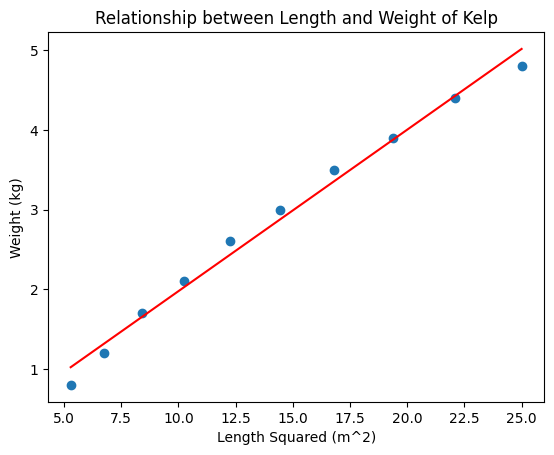

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# manually measured length of the kelp (in meters)
length = [2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5.0]

# corresponding weight of the kelp (in kilograms)
weight = [0.8, 1.2, 1.7, 2.1, 2.6, 3.0, 3.5, 3.9, 4.4, 4.8]

# transform the length data by taking its square
X = np.array(length)**2

# reshape the data to the format expected by the LinearRegression model
X = X.reshape(-1, 1)
y = np.array(weight)

# fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# plot the data as a scatter plot
plt.scatter(X, y)

# plot the linear regression line
plt.plot(X, model.predict(X), color='red')

# add axis labels and a title
plt.xlabel("Length Squared (m^2)")
plt.ylabel("Weight (kg)")
plt.title("Relationship between Length and Weight of Kelp")

# show the plot
plt.show()

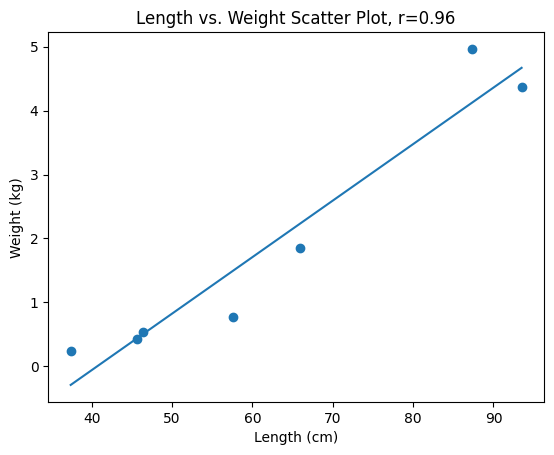

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Define the data
lengthGT = [45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9]
weightGT = [0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844]

# Calculate the correlation coefficient and p-value
r, p = pearsonr(lengthGT, weightGT)

# Create the scatter plot with a regression line
fig, ax = plt.subplots()
ax.scatter(lengthGT, weightGT)
ax.plot(np.unique(lengthGT), np.poly1d(np.polyfit(lengthGT, weightGT, 1))(np.unique(lengthGT)))
ax.set_xlabel('Length (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_title('Length vs. Weight Scatter Plot, r={:.2f}'.format(r))

plt.show()

In [7]:
from scipy.stats import pearsonr

# Convert the area_data to a numpy array
area_data = np.array([[3073, 3204, 3800, 3872, 4226, 4912],
                      [5019, 4562, 5316, 4146, 4323, 4071],
                      [3617, 3268, 2699, 3305, 3165, 3242],
                      [4342, 4730, 4587, 4675, 5078, 4915],
                      [8600, 7956, 8050, 7692, 7084, 8213],
                      [8342, 8554, 7793, 8565, 6091, 6955],
                      [4100, 4156, 3348, 3389, 2491, 3902]])

# Calculate the mean of the area data for each day
area_mean = np.mean(area_data, axis=1)

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(area_mean, lengthGT)

print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

Pearson correlation coefficient: 0.8984710621826355
P-value: 0.005968820415948963


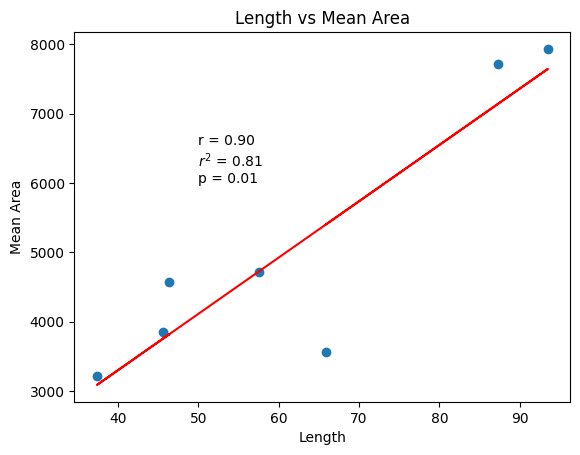

In [13]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

length = [45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9]
area_data = [[3073, 3204, 3800, 3872, 4226, 4912],
             [5019, 4562, 5316, 4146, 4323, 4071],
             [3617, 3268, 2699, 3305, 3165, 3242],
             [4342, 4730, 4587, 4675, 5078, 4915],
             [8600, 7956, 8050, 7692, 7084, 8213],
             [8342, 8554, 7793, 8565, 6091, 6955],
             [4100, 4156, 3348, 3389, 2491, 3902]]

# calculate the mean of the area data for each day
mean_area = np.mean(area_data, axis=1)

# calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(length, mean_area)

# calculate the regression line
slope, intercept = np.polyfit(length, mean_area, 1)
reg_line = slope * np.array(length) + intercept

# calculate the coefficient of determination (r squared)
r_squared = corr_coef ** 2

# plot the scatter plot and regression line
plt.scatter(length, mean_area)
plt.plot(length, reg_line, color='red')
plt.xlabel('Length')
plt.ylabel('Mean Area')
plt.title('Length vs Mean Area')
plt.text(50, 6000, f'r = {corr_coef:.2f}\n$r^2$ = {r_squared:.2f}\np = {p_value:.2f}')
plt.show()


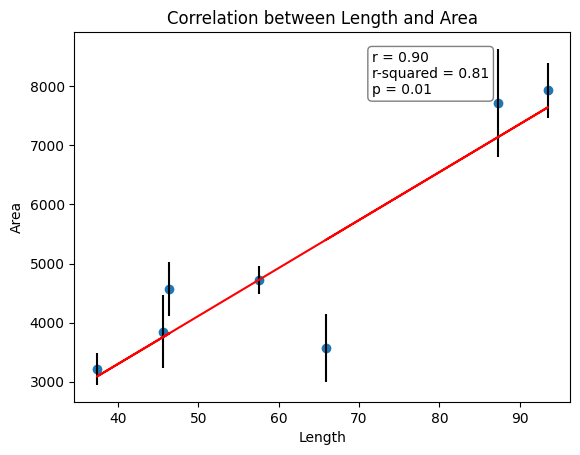

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

length_data = [45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9]
weight_data = [0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844]
area_data = [[3073, 3204, 3800, 3872, 4226, 4912],
             [5019, 4562, 5316, 4146, 4323, 4071],
             [3617, 3268, 2699, 3305, 3165, 3242],
             [4342, 4730, 4587, 4675, 5078, 4915],
             [8600, 7956, 8050, 7692, 7084, 8213],
             [8342, 8554, 7793, 8565, 6091, 6955],
             [4100, 4156, 3348, 3389, 2491, 3902]]

mean_area_data = [np.mean(area) for area in area_data]

# calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(length_data, mean_area_data)

# calculate the linear regression
X = np.array(length_data).reshape(-1, 1)
y = np.array(mean_area_data)
reg = LinearRegression().fit(X, y)
r_squared = reg.score(X, y)

# plot the scatter plot
plt.scatter(length_data, mean_area_data)

# plot the error bars
y_error = [np.std(area) for area in area_data]
plt.errorbar(length_data, mean_area_data, yerr=y_error, fmt='none', ecolor='black')

# plot the correlation line
plt.plot(length_data, reg.predict(X), color='red')

# add labels and title
plt.xlabel('Length')
plt.ylabel('Area')
plt.title('Correlation between Length and Area')

# add text box with correlation coefficients
textstr = '\n'.join((f'r = {corr_coef:.2f}', f'r-squared = {r_squared:.2f}', f'p = {p_value:.2f}'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.6, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.show()

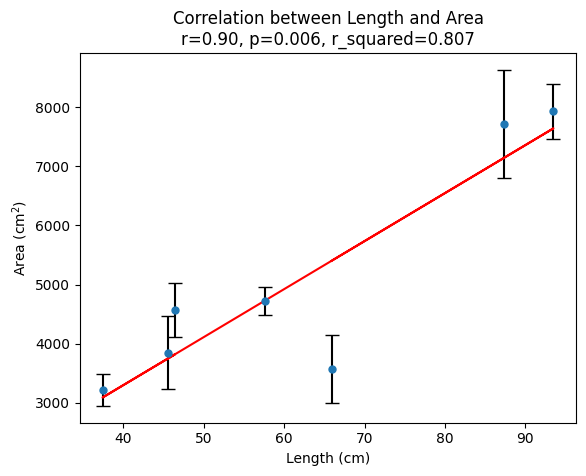

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

length_data = [45.6, 46.4, 37.4, 57.6, 93.5, 87.3, 65.9]
area_data = [[3073, 3204, 3800, 3872, 4226, 4912],
             [5019, 4562, 5316, 4146, 4323, 4071],
             [3617, 3268, 2699, 3305, 3165, 3242],
             [4342, 4730, 4587, 4675, 5078, 4915],
             [8600, 7956, 8050, 7692, 7084, 8213],
             [8342, 8554, 7793, 8565, 6091, 6955],
             [4100, 4156, 3348, 3389, 2491, 3902]]
mean_area_data = np.mean(area_data, axis=1)

slope, intercept, r_value, p_value, std_err = linregress(length_data, mean_area_data)
r_squared = r_value ** 2

fig, ax = plt.subplots()
ax.errorbar(length_data, mean_area_data, yerr=np.std(area_data, axis=1), fmt='o', ecolor='black', capsize=5, markersize=5)
ax.plot(length_data, slope * np.array(length_data) + intercept, color='red')
ax.set_xlabel('Length (cm)')
ax.set_ylabel('Area (cm$^2$)')
ax.set_title('Correlation between Length and Area\nr={:.2f}, p={:.3f}, r_squared={:.3f}'.format(r_value, p_value, r_squared))

plt.show()

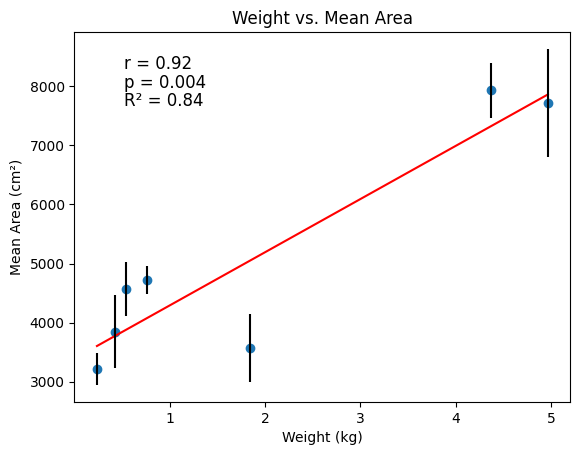

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Weight data
weight_data = [0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844]

# Area data
area_data = np.array([[3073, 3204, 3800, 3872, 4226, 4912],
                      [5019, 4562, 5316, 4146, 4323, 4071],
                      [3617, 3268, 2699, 3305, 3165, 3242],
                      [4342, 4730, 4587, 4675, 5078, 4915],
                      [8600, 7956, 8050, 7692, 7084, 8213],
                      [8342, 8554, 7793, 8565, 6091, 6955],
                      [4100, 4156, 3348, 3389, 2491, 3902]])

# Calculate mean of area data for each day
mean_area_data = np.mean(area_data, axis=1)

# Create scatter plot
plt.scatter(weight_data, mean_area_data)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight_data, mean_area_data)

# Calculate R-squared
r_squared = r_value ** 2

# Add correlation line to scatter plot
x_values = np.array([min(weight_data), max(weight_data)])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')

# Add correlation coefficient and p-value to plot
plt.annotate("r = {:.2f}".format(r_value), xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate("p = {:.3f}".format(p_value), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)

# Add R-squared value to plot
plt.annotate("R² = {:.2f}".format(r_squared), xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)

# Add error bars to plot
plt.errorbar(weight_data, mean_area_data, yerr=np.std(area_data, axis=1), fmt='none', color='black')

# Add axis labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Mean Area (cm²)')
plt.title('Weight vs. Mean Area')

# Display plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats

# Weight data
weight_data = np.array([0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844])

# Mean area data
area_data = [[3073, 3204, 3800, 3872, 4226, 4912],
             [5019, 4562, 5316, 4146, 4323, 4071],
             [3617, 3268, 2699, 3305, 3165, 3242],
             [4342, 4730, 4587, 4675, 5078, 4915],
             [8600, 7956, 8050, 7692, 7084, 8213],
             [8342, 8554, 7793, 8565, 6091, 6955],
             [4100, 4156, 3348, 3389, 2491, 3902]]

# calculate mean and standard deviation of area
area_mean = np.mean(area_data, axis=1)
area_std = np.std(area_data, axis=1)

# Reshape weight data to column vector
x = weight_data.reshape(-1, 1)

# Mean area data to column vector
y = area_mean.reshape(-1, 1)

# Create polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

# Fit linear regression model
model = LinearRegression()
model.fit(x_poly, y)

# Get coefficients and intercept of polynomial regression model
coef_1 = model.coef_[0][1]
coef_2 = model.coef_[0][2]
intercept = model.intercept_[0]

# Create x values for plotting
x_plot = np.linspace(x.min(), x.max(), 100)

# Calculate y values for plotting
y_plot = coef_2 * x_plot**2 + coef_1 * x_plot + intercept

# Calculate the correlation coefficient (r), p-value and r-squared
r = np.corrcoef(x[:,0], y[:,0])[0,1]
r_squared = model.score(x_poly, y)
r_pear, p_value = stats.pearsonr(weight_data, area_mean)

# Plot the scatter plot with regression line
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color='red')
plt.errorbar(weight_data, area_mean, yerr=area_std, fmt='o', capsize=5, color='blue')
plt.xlabel('Weight (kg)')
plt.ylabel('Area (cm^2)')
plt.text(0.1, 7800, f'r={r:.4f}\nr_pear={r_pear:.4f}\np={p_value:.3f}\nr$^2$={r**2:.4f}', bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()

In [51]:
xData = np.array([38.48, 45.73, 32.16, 47.21, 79.33, 77.17, 35.64])
yData = np.array([0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844])

yLog = np.log(yData)
print(yLog)

b, a = np.polyfit(xData, yLog, 1)
print('a:', a)
print('b:', b)

[-0.84863208 -0.61618614 -1.43548461 -0.26396555  1.47476301  1.60261469
  0.61193713]
a: -2.5213085576052934
b: 0.051091325622949664


In [15]:
y = np.exp(-2.52) * np.exp(0.05*xData)
print(y)

[0.55101128 0.7917576  0.40171998 0.85256997 4.2482197  3.81331923
 0.4780691 ]


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import sem, pearsonr

def scipyPLot(x, y, xerr, yerr, days, xlabel, ylabel, xtitle, ytitle):

    xData = np.array([x])
    yData = np.array([y])
    c = np.array(days)
    if xerr is not None:
        xerr = np.array(xerr)
    if yerr is not None:
        yerr = np.array(yerr)

    def func(x, a, b):
        return np.exp(a) * np.exp(b*x)
    
    yLog = np.log(yData)
    b, a = np.polyfit(xData, yLog, 1)

    xdata = np.linspace(xData.min(), xData.max(), 50)
    y = func(xdata, a, b)
    rng = np.random.default_rng()
    y_noise = 0.2 * rng.normal(size=xdata.size)
    ydata = y + y_noise
    
    popt, pcov = curve_fit(func, xdata, y)
    
    r, p = pearsonr(xdata, y)
    r2 = np.square(r)
    
    # make scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(xData, yData, c=c)
    ax.errorbar(xData, yData, xerr=xerr, yerr=yerr, linestyle='None', elinewidth=1, capsize=3)

    # produce a legend with the unique colors from the scatter
    ax.legend(*scatter.legend_elements(), title="Day", loc='lower right')
    
    # add trendline to the plot
    ax.plot(xdata, func(xdata, *popt))
    
    # add trendline equation and r2 to plot
    #ax.text(.02,.98, f'y = {slope:.2f}x + {intercept:.2f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.98, f'r = {r:.4f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.94, f'p = {p:.4f}', ha='left', va='top', transform=ax.transAxes)
    ax.text(.02,.90, f'r2 = {r2:.4f}', ha='left', va='top', transform=ax.transAxes)
    
    # label the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # give title
    #plt.title(f'{xtitle} and {ytitle}')
    
    # save plot
    #plt.savefig(f'C:/Users/marti/opencv/monitare/plots/{xlabel}vs{ylabel}.jpg', bbox_inches='tight')
    
    # display plot
    plt.show;
    
    return None

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Manually measured weight data in kilos for seven individual days
weight_data = np.array([0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844])

# Estimated area data in square centimeters for the same days
area_data = np.array([3529.5, 4607, 3219.8, 4722.83, 7780.83, 7800.17, 3663.33])

# Fit a linear regression model
reg = LinearRegression().fit(area_data.reshape(-1,1), weight_data)

# Calculate the predicted weights for each day
predicted_weight = reg.predict(area_data.reshape(-1,1))

# Calculate the residuals for each day
residuals = weight_data - predicted_weight

# Calculate the mean squared error (MSE) and mean absolute error (MAE) for each day
MSE = mean_squared_error(weight_data, predicted_weight)
MAE = mean_absolute_error(weight_data, predicted_weight)

print("MSE for each day:", np.round(residuals**2, 4))
print("MAE for each day:", np.round(np.abs(residuals), 4))
print("Average MSE:", np.round(MSE, 4))
print("Average MAE:", np.round(MAE, 4))

MSE for each day: [7.0000e-04 8.5900e-01 5.4000e-03 6.5210e-01 5.8000e-03 2.5140e-01
 1.5955e+00]
MAE for each day: [0.0272 0.9268 0.0735 0.8075 0.0765 0.5014 1.2631]
Average MSE: 0.4814
Average MAE: 0.5252


Accuracy of area data:
Row 1: 93.44%
Row 2: 95.93%
Row 3: 96.55%
Row 4: 97.98%
Row 5: 97.59%
Row 6: 95.15%
Row 7: 93.42%


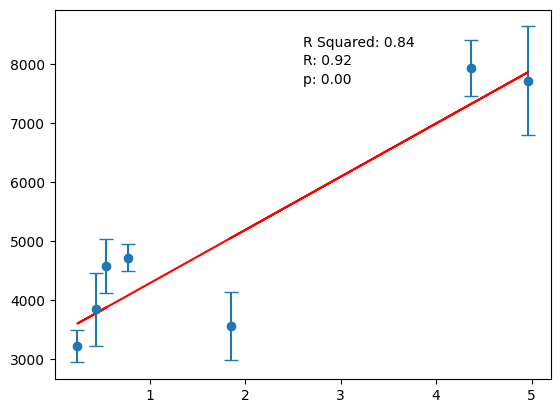

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
weight_data = np.array([0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844])
area_data = [[3073, 3204, 3800, 3872, 4226, 4912],
             [5019, 4562, 5316, 4146, 4323, 4071],
             [3617, 3268, 2699, 3305, 3165, 3242],
             [4342, 4730, 4587, 4675, 5078, 4915],
             [8600, 7956, 8050, 7692, 7084, 8213],
             [8342, 8554, 7793, 8565, 6091, 6955],
             [4100, 4156, 3348, 3389, 2491, 3902]]

# Calculate the mean of each row of area_data
mean_area_data = np.mean(area_data, axis=1)

# Calculate the standard deviation of each row of area_data
std_area_data = np.std(area_data, axis=1)

# Create a scatter plot with error bars
plt.errorbar(weight_data, mean_area_data, yerr=std_area_data, fmt='o', capsize=5)

# Add a correlation line
slope, intercept, r_value, p_value, std_err = linregress(weight_data, mean_area_data)
plt.plot(weight_data, intercept + slope*weight_data, 'r')

# Add the r squared, r and p values to the plot
plt.annotate("R Squared: {:.2f}".format(r_value**2), xy=(0.5, 0.9), xycoords='axes fraction')
plt.annotate("R: {:.2f}".format(r_value), xy=(0.5, 0.85), xycoords='axes fraction')
plt.annotate("p: {:.2f}".format(p_value), xy=(0.5, 0.8), xycoords='axes fraction')

# Calculate the accuracy of the area data for each individual mean area
accuracies = np.zeros(mean_area_data.shape)
for i in range(len(area_data)):
    accuracies[i] = 1 - (std_area_data[i] / np.sqrt(len(area_data[i])) / mean_area_data[i])
    
# Print the accuracy for each row of area_data
print("Accuracy of area data:")
for i, acc in enumerate(accuracies):
    print("Row {}: {:.2%}".format(i+1, acc))

# Show the plot
plt.show()

R-squared: 0.8397
Correlation coefficient: 0.9164
p-value: 0.0037
MSE: [  1.90504633  15.25140179 -12.04575618  13.56418858   7.65571758
  -1.8839605  -41.68048636]
RMSE: [1.38023416 3.90530431        nan 3.68295922 2.76689674        nan
        nan]


C:\Users\marti\AppData\Local\Temp\ipykernel_14952\1229452196.py:40: RuntimeWarning: invalid value encountered in sqrt
  RMSE = np.sqrt(MSE)


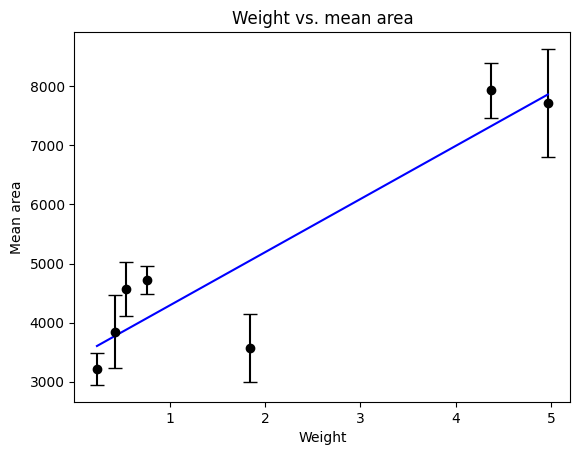

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
weight_data = np.array([0.428, 0.54, 0.238, 0.768, 4.37, 4.966, 1.844])
area_data = np.array([[3073, 3204, 3800, 3872, 4226, 4912],
                      [5019, 4562, 5316, 4146, 4323, 4071],
                      [3617, 3268, 2699, 3305, 3165, 3242],
                      [4342, 4730, 4587, 4675, 5078, 4915],
                      [8600, 7956, 8050, 7692, 7084, 8213],
                      [8342, 8554, 7793, 8565, 6091, 6955],
                      [4100, 4156, 3348, 3389, 2491, 3902]])

# Calculate mean and standard deviation of area data
area_mean = np.mean(area_data, axis=1)
area_std = np.std(area_data, axis=1)

# Scatter plot with error bars
plt.errorbar(weight_data, area_mean, yerr=area_std, fmt='o', color='black', capsize=5)
plt.xlabel('Weight')
plt.ylabel('Mean area')
plt.title('Weight vs. mean area')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight_data, area_mean)
x = np.linspace(min(weight_data), max(weight_data), 100)
y = slope * x + intercept
plt.plot(x, y, color='blue')

# Correlation metrics
r_squared = r_value ** 2
print(f'R-squared: {r_squared:.4f}')
print(f'Correlation coefficient: {r_value:.4f}')
print(f'p-value: {p_value:.4f}')

# Calculate accuracy of individual area estimates compared to regression
area_pred = slope * weight_data + intercept
MSE = (area_mean - area_pred) / area_mean * 100
RMSE = np.sqrt(MSE)
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')